In [1]:
# imports 
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest


import re
#and visualization setup
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
path = path = '/Users/desislavamarvakov/Study/HIT/שנה ב׳/סמסטר ב׳/Data Science/Final Project/Code/clean_outcome_intake.csv'
df = pd.read_csv(path)
df.drop(columns = ['Unnamed: 0','sex_upon_outcome','outcome_type','age_upon_outcome','age_upon_outcome_(days)','age_upon_outcome_(years)','age_upon_outcome_age_group','age_upon_intake_age_group'], inplace = True)
df.head()

,animal_id_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),time_in_shelter_days
0,A006100,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,3650,10.0,0.588194
1,A006100,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2555,7.0,1.259722
2,A006100,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2190,6.0,1.113889
3,A047759,10 years,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,3650,10.0,4.970139
4,A134067,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,5840,16.0,0.119444


In [3]:
pd.unique(df['sex_upon_intake'])

array(['Neutered Male', 'Spayed Female', 'Intact Female', 'Intact Male',
       'Unknown'], dtype=object)

In [4]:
#Mix 0, pure 1
def breedType(x):
    if bool(re.search('/', x)):
        return 0
    elif bool(re.search('Mix', x)):
        return 0
    else:
        return 1

In [5]:
#Mix 0, pure 1
def colorPurity(x):
    if bool(re.search('/', x)):
        return 0
    elif bool(re.search('Tricolor', x)):
        return 0
    else:
        return 1

In [6]:
#male 0, female 1, unknown 2
def Gender(x):
    if bool(re.search('Male', x)):
        return 0
    elif bool(re.search('Female', x)):
        return 1
    else:
        return 2

In [7]:
def age_group(age):
    if age < 1: group = 'puppy_kitten'
    elif age < 3: group = 'young'
    elif age < 6: group = 'adult'
    else: group = 'old'
    return group

In [8]:
#0 for cats, 1 for dogs
def AnimalType(x):
    if bool(re.search('Dog', x)):
        return 1
    else:
        return 0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74870 entries, 0 to 74869
Data columns (total 12 columns):
animal_id_outcome          74870 non-null object
age_upon_intake            74870 non-null object
animal_id_intake           74870 non-null object
animal_type                74870 non-null object
breed                      74870 non-null object
color                      74870 non-null object
intake_condition           74870 non-null object
intake_type                74870 non-null object
sex_upon_intake            74870 non-null object
age_upon_intake_(days)     74870 non-null int64
age_upon_intake_(years)    74870 non-null float64
time_in_shelter_days       74870 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 6.9+ MB


In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age_upon_intake_(days)     1035.000000
age_upon_intake_(years)       2.835616
time_in_shelter_days         12.926563
dtype: float64


In [11]:
Q1

age_upon_intake_(days)     60.000000
age_upon_intake_(years)     0.164384
time_in_shelter_days        1.788889
Name: 0.25, dtype: float64

In [12]:
Q3

age_upon_intake_(days)     1095.000000
age_upon_intake_(years)       3.000000
time_in_shelter_days         14.715451
Name: 0.75, dtype: float64

In [13]:
df["age_upon_intake_(years)"] = np.where(df["age_upon_intake_(years)"] <0.164383561, 0.164383561,df['age_upon_intake_(years)'])
df["age_upon_intake_(years)"] = np.where(df["age_upon_intake_(years)"] >3.0, 3.0,df['age_upon_intake_(years)'])
print(df['age_upon_intake_(years)'].skew())

0.4057320754782535


In [14]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(59450, 12)


In [15]:
df

,animal_id_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),time_in_shelter_days
1,A006100,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2555,3.000000,1.259722
2,A006100,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2190,3.000000,1.113889
198,A373219,5 years,A373219,Cat,Domestic Shorthair Mix,Brown Tabby,Normal,Owner Surrender,Spayed Female,1825,3.000000,7.189583
278,A419781,7 years,A419781,Dog,Labrador Retriever Mix,Red,Normal,Stray,Spayed Female,2555,3.000000,1.085417
280,A420464,7 years,A420464,Dog,Labrador Retriever Mix,Black/White,Normal,Stray,Neutered Male,2555,3.000000,1.309722
...,...,...,...,...,...,...,...,...,...,...,...,...
74864,A769057,2 weeks,A769057,Cat,Domestic Shorthair Mix,Gray Tabby,Normal,Stray,Unknown,14,0.164384,0.076389
74865,A769058,2 weeks,A769058,Cat,Domestic Shorthair Mix,Blue,Normal,Stray,Unknown,14,0.164384,0.076389
74866,A769059,2 weeks,A769059,Cat,Domestic Shorthair Mix,Blue,Normal,Stray,Unknown,14,0.164384,0.708333
74867,A769060,2 weeks,A769060,Cat,Domestic Shorthair Mix,Tortie,Normal,Stray,Unknown,14,0.164384,0.077083


In [16]:
df.breed = df.breed.apply(breedType)
df.color = df.color.apply(colorPurity)
#df['age_upon_intake_(years)'] = df['age_upon_intake_(years)'].apply(age_group)
df.animal_type = df.animal_type.apply(AnimalType)
df.sex_upon_intake = df.sex_upon_intake.apply(Gender)
df.head()

,animal_id_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),time_in_shelter_days
1,A006100,7 years,A006100,1,0,0,Normal,Public Assist,0,2555,3.0,1.259722
2,A006100,6 years,A006100,1,0,0,Normal,Public Assist,0,2190,3.0,1.113889
198,A373219,5 years,A373219,0,0,1,Normal,Owner Surrender,1,1825,3.0,7.189583
278,A419781,7 years,A419781,1,0,1,Normal,Stray,1,2555,3.0,1.085417
280,A420464,7 years,A420464,1,0,0,Normal,Stray,0,2555,3.0,1.309722


In [17]:
df.describe()

,animal_type,breed,color,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),time_in_shelter_days
count,59450.000000,59450.000000,59450.000000,59450.000000,59450.000000,59450.000000,59450.000000
mean,0.621396,0.048663,0.435071,0.547216,556.494230,1.249365,6.737108
std,0.485043,0.215164,0.495771,0.584094,630.896179,1.078096,7.430372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.164384,0.000000
25%,0.000000,0.000000,0.000000,0.000000,60.000000,0.164384,1.136111
50%,1.000000,0.000000,0.000000,1.000000,365.000000,1.000000,4.257986
75%,1.000000,0.000000,1.000000,1.000000,730.000000,2.000000,8.962500
max,1.000000,1.000000,1.000000,2.000000,2555.000000,3.000000,34.104861


In [18]:
df[(df['time_in_shelter_days']<100)&(df['age_upon_intake_(years)']<2.0)&(df['time_in_shelter_days']>2)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26376 entries, 1215 to 74858
Data columns (total 12 columns):
animal_id_outcome          26376 non-null object
age_upon_intake            26376 non-null object
animal_id_intake           26376 non-null object
animal_type                26376 non-null int64
breed                      26376 non-null int64
color                      26376 non-null int64
intake_condition           26376 non-null object
intake_type                26376 non-null object
sex_upon_intake            26376 non-null int64
age_upon_intake_(days)     26376 non-null int64
age_upon_intake_(years)    26376 non-null float64
time_in_shelter_days       26376 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 2.6+ MB


In [19]:
# def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = 'purple', yscale_log=False):

#     # Create the plot object
#     _, ax = plt.subplots()

#     # Plot the data, set the size (s), color and transparency (alpha)
#     # of the points
#     ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

#     if yscale_log == True:
#         ax.set_yscale('log')

#     # Label the axes and provide a title
#     ax.set_title(title)
#     ax.set_xlabel(x_label)
#     ax.set_ylabel(y_label)

In [20]:
# df.apply(scatterplot(df['age_upon_intake_(years)'],df['time_in_shelter_days'],'Age upon intake','Time in shelter (days)','t'))

In [21]:
pd.unique(df['intake_type'])

array(['Public Assist', 'Owner Surrender', 'Stray', 'Euthanasia Request'],
      dtype=object)

In [22]:
pd.unique(df['intake_condition'])

array(['Normal', 'Injured', 'Sick', 'Pregnant', 'Other', 'Aged',
       'Nursing', 'Feral'], dtype=object)

In [23]:
#checking the validity of the data
df[df['animal_id_outcome']!=df['animal_id_intake']]

,animal_id_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),time_in_shelter_days


In [24]:

df.drop(columns = ['animal_id_outcome','age_upon_intake_(days)','age_upon_intake'],inplace=True)
#df.drop(columns = ['animal_id_outcome','age_upon_intake_(days)','age_upon_intake','intake_condition'],inplace=True)

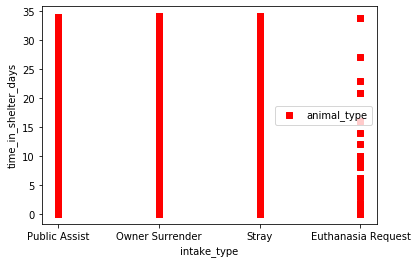

In [25]:
plt.scatter(x=df['intake_type'],y=df['time_in_shelter_days'],c='r',marker='s',label='animal_type')
# plt.scatter(x=df['age_upon_intake_(years)'],y=df['time_in_shelter_days'],c='b',marker='o',label='age_upon_intake')
# plt.scatter(x=df['intake_condition'],y=df['time_in_shelter_days'],c='k',marker='*',label='intake_condition')

plt.legend(numpoints=1,loc=5)
plt.xlabel('intake_type')
plt.ylabel('time_in_shelter_days')
plt.show()

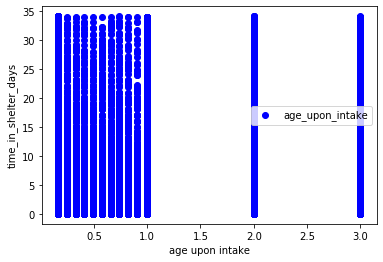

In [26]:
plt.scatter(x=df['age_upon_intake_(years)'],y=df['time_in_shelter_days'],c='b',marker='o',label='age_upon_intake')

plt.legend(numpoints=1,loc=5)
plt.xlabel('age upon intake')
plt.ylabel('time_in_shelter_days')
plt.show()

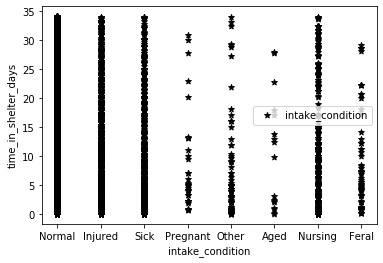

In [27]:
plt.scatter(x=df['intake_condition'],y=df['time_in_shelter_days'],c='k',marker='*',label='intake_condition')

plt.legend(numpoints=1,loc=5)
plt.xlabel('intake_condition')
plt.ylabel('time_in_shelter_days')
plt.show()

In [28]:
df['time_in_shelter_days'].value_counts()

0.085417     51
0.063889     49
0.079861     49
0.054861     48
0.070833     47
             ..
19.772917     1
32.070833     1
17.093750     1
3.666667      1
27.311111     1
Name: time_in_shelter_days, Length: 18810, dtype: int64

In [29]:
df['time_in_shelter_days'].max()

34.10486111

In [30]:
df = pd.get_dummies(df, columns=['intake_type'])

We decided to drop the "intake condition" column because we don't think it would benefit the model.
if the accuracy won't be high, we will try it again by including this column

In [31]:
df.drop(columns=['intake_condition'],inplace = True)
#df.drop(columns=['intake_type'],inplace = True)

In [32]:
df_ID = df['animal_id_intake']
df.drop(columns=['animal_id_intake'],inplace = True)
TRAINING_FEATURES = df[df.columns.difference(['time_in_shelter_days'])]

TARGET_FEATURE    = 'time_in_shelter_days'

X = TRAINING_FEATURES
y = df[TARGET_FEATURE]
# X.info()
df

,animal_type,breed,color,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray
1,1,0,0,0,3.000000,1.259722,0,0,1,0
2,1,0,0,0,3.000000,1.113889,0,0,1,0
198,0,0,1,1,3.000000,7.189583,0,1,0,0
278,1,0,1,1,3.000000,1.085417,0,0,0,1
280,1,0,0,0,3.000000,1.309722,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
74864,0,0,1,2,0.164384,0.076389,0,0,0,1
74865,0,0,1,2,0.164384,0.076389,0,0,0,1
74866,0,0,1,2,0.164384,0.708333,0,0,0,1
74867,0,0,1,2,0.164384,0.077083,0,0,0,1


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape))
print("Number of training samples: #{}".format(X_train.shape))
print("Number of test samples: #{}".format(X_test.shape))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #(59450, 9)
Number of training samples: #(47560, 9)
Number of test samples: #(11890, 9)

Target distribution in original dataset:
0.085417     51
0.063889     49
0.079861     49
0.054861     48
0.070833     47
             ..
19.772917     1
32.070833     1
17.093750     1
3.666667      1
27.311111     1
Name: time_in_shelter_days, Length: 18810, dtype: int64

Target distribution in the training set:
0.054861     42
0.079861     41
0.090972     40
0.068750     39
0.063889     39
             ..
10.155556     1
27.247917     1
19.127083     1
18.234722     1
21.875694     1
Name: time_in_shelter_days, Length: 16923, dtype: int64

Target distribution in the test set:
0.044444     13
0.042361     13
0.050000     12
0.034028     12
0.085417     12
             ..
6.853472      1
28.009722     1
8.690972      1
26.222917     1
1.260417      1
Name: time_in_shelter_days, Length: 7406, dtype: int64


In [34]:
model = linear_model.LinearRegression()

In [35]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred = model.predict(X_test)

In [37]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 0.04963479 -0.62502525 -0.59874547 -0.27898628 -3.129882    1.19005902
  2.34571296 -0.40588999 -1.1972608 ]
Intercept: 7.803883816465925
Mean squared error (MSE): 53.13
Coefficient of determination (R^2): 0.02


In [38]:
r2_score(y_test, y_pred)

0.023940526754990366

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_trained_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
scaler.mean_

array([1.24872835, 0.62180404, 0.04871741, 0.43429352, 0.00178722,
       0.18706897, 0.06602187, 0.74512195, 0.54602607])

In [41]:
scaler.scale_

array([1.0788996 , 0.48493688, 0.21527662, 0.49566386, 0.04223768,
       0.38996688, 0.24832032, 0.43579264, 0.58422724])

In [42]:
X_trained_scaled = pd.DataFrame(X_trained_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [43]:
np.round(X_trained_scaled.describe(),2)

,age_upon_intake_(years),animal_type,breed,color,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,sex_upon_intake
count,47560.00,47560.00,47560.00,47560.00,47560.00,47560.00,47560.00,47560.00,47560.00
mean,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.01,-1.28,-0.23,-0.88,-0.04,-0.48,-0.27,-1.71,-0.93
25%,-1.01,-1.28,-0.23,-0.88,-0.04,-0.48,-0.27,-1.71,-0.93
50%,-0.23,0.78,-0.23,-0.88,-0.04,-0.48,-0.27,0.58,-0.93
75%,0.70,0.78,-0.23,1.14,-0.04,-0.48,-0.27,0.58,0.78
max,1.62,0.78,4.42,1.14,23.63,2.08,3.76,0.58,2.49


In [44]:
model_scaled = LinearRegression().fit(X_trained_scaled, y_train)

In [45]:
print('Coefficients:', model_scaled.coef_)
print('Intercept:', model_scaled.intercept_)
print('model score is',model_scaled.score(X_trained_scaled,y_train))

Coefficients: [ 5.36176027e-02 -3.03179911e-01 -1.28930729e-01 -1.37651951e-01
 -3.93339689e+11 -3.63157811e+12 -2.31249031e+12 -4.05833190e+12
 -6.99613535e-01]
Intercept: 6.742438847143209
model score is 0.02414550432711904


In [46]:
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [47]:
y_pred_scaled

array([6.86909751, 8.47688173, 5.96944664, ..., 6.50435141, 5.44356774,
       9.67512392])

In [48]:
print('mean squared error on scaled data is ', np.round(mean_squared_error(y_pred_scaled, y_test)),2)
print('r squared on scaled data is ', r2_score(y_pred_scaled, y_test))

mean squared error on scaled data is  53.0 2
r squared on scaled data is  -38.905613776873764
